In [11]:
from typing import List

import numpy as np
from IPython import display
from PIL import Image, ImageDraw, ImageFilter, ImageOps
from PIL.ImageEnhance import Contrast
from tqdm import tqdm

from main import dataloader, to_vect, Coordinates, NeuroForestSample


In [3]:
sample = next(iter(dataloader))
session = sample["patchy"]
ZOOM_FACTOR = 3.0

def transform(coords: List[Coordinates], offset: np.ndarray, factor: float) -> np.ndarray:
    return (to_vect(coords) + offset) * factor
mushrooms_coords = transform(session.mushroom_coords, np.array([200, 0, 200]), ZOOM_FACTOR)
mushrooms_coords = mushrooms_coords[:,[0,2]]
player_coords = transform([c["coord"] for c in session.player_coords], np.array([200, 0, 200]), ZOOM_FACTOR)
player_coords = player_coords[:,[0,2]]
max_coord_x = int(mushrooms_coords[:,0].max())
max_coord_z = int(mushrooms_coords[:,1].max())

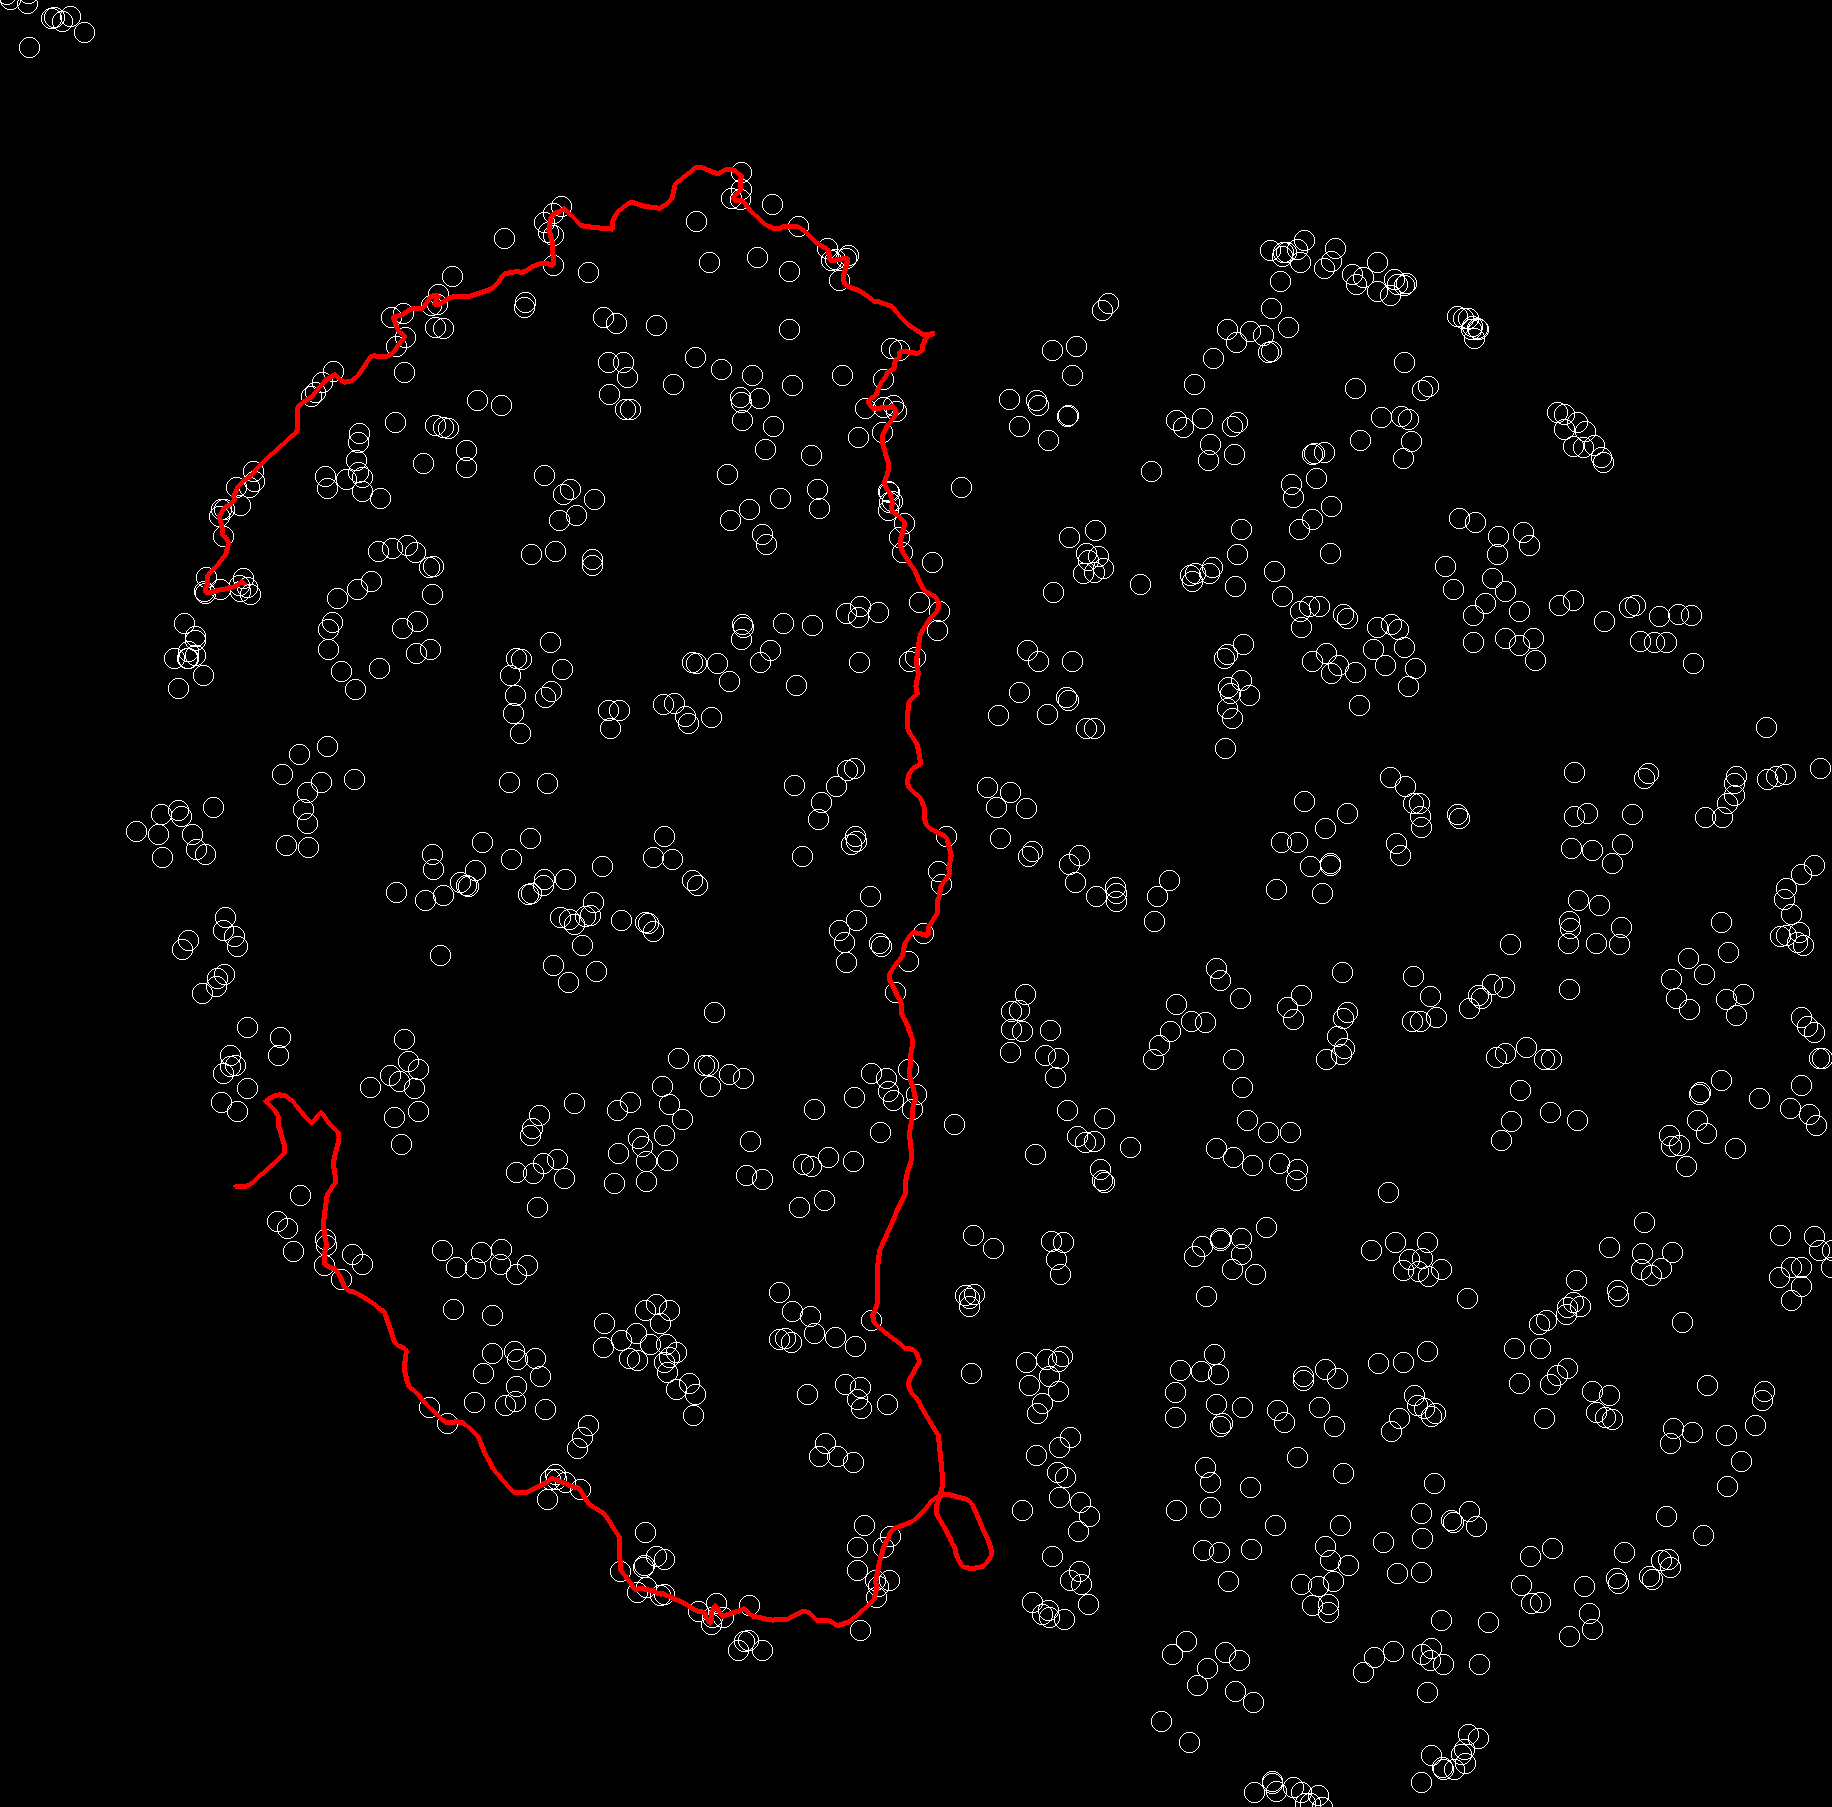

In [4]:

with Image.new(mode="RGB", size=(max_coord_x, max_coord_z)) as im:
    draw = ImageDraw.Draw(im)
    for m in mushrooms_coords:
        draw.ellipse((tuple((m - 10).astype(int)), tuple((m + 10).astype(int)) ))
    draw.line([tuple(p) for p in player_coords.astype(int)], fill=(255,0,0), width=5)
    display.display(im)
img_shrooms = im

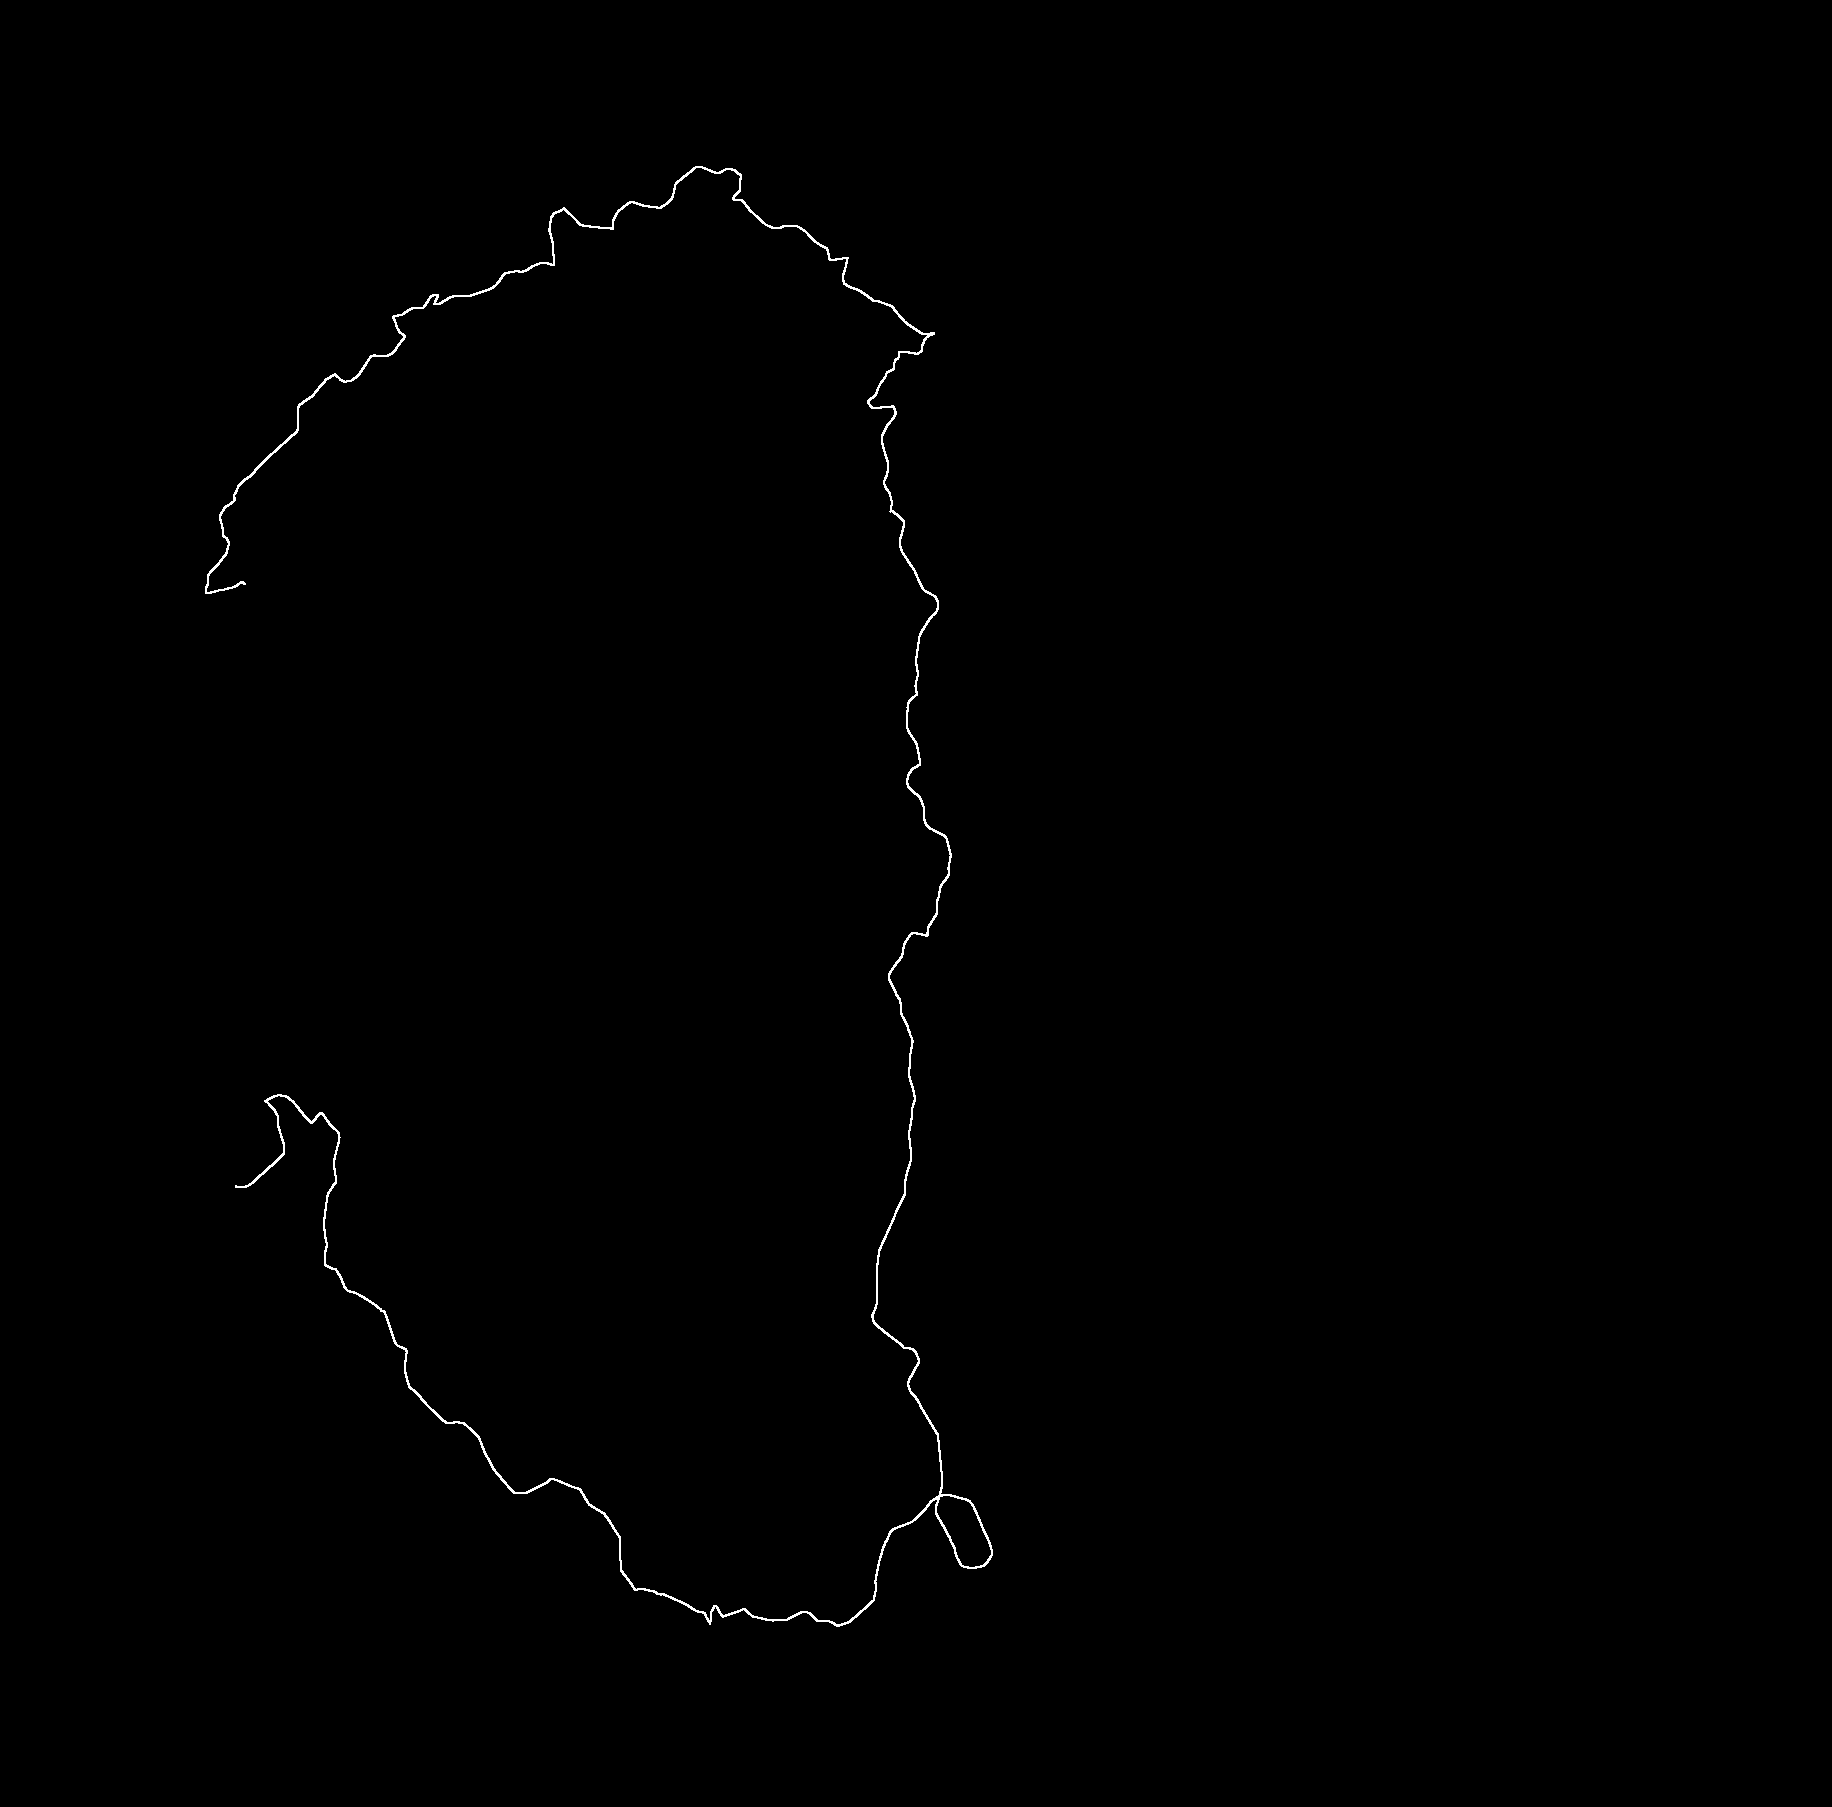

In [5]:
with Image.new(mode="1", size=(max_coord_x, max_coord_z)) as im:
    draw = ImageDraw.Draw(im)
    draw.line([tuple(p) for p in player_coords.astype(int)],fill=1, width=2)
    display.display(im)
    player_trajectory = np.array(im)

for first


100%|██████████| 37/37 [00:13<00:00,  2.81it/s]
/tmp/ipykernel_107841/36637667.py:16: RuntimeWarning: divide by zero encountered in log
  log_scaled = np.log(overlayed_trajectories)
/tmp/ipykernel_107841/36637667.py:18: RuntimeWarning: invalid value encountered in cast
  img = Image.fromarray(normed.astype(np.uint8))


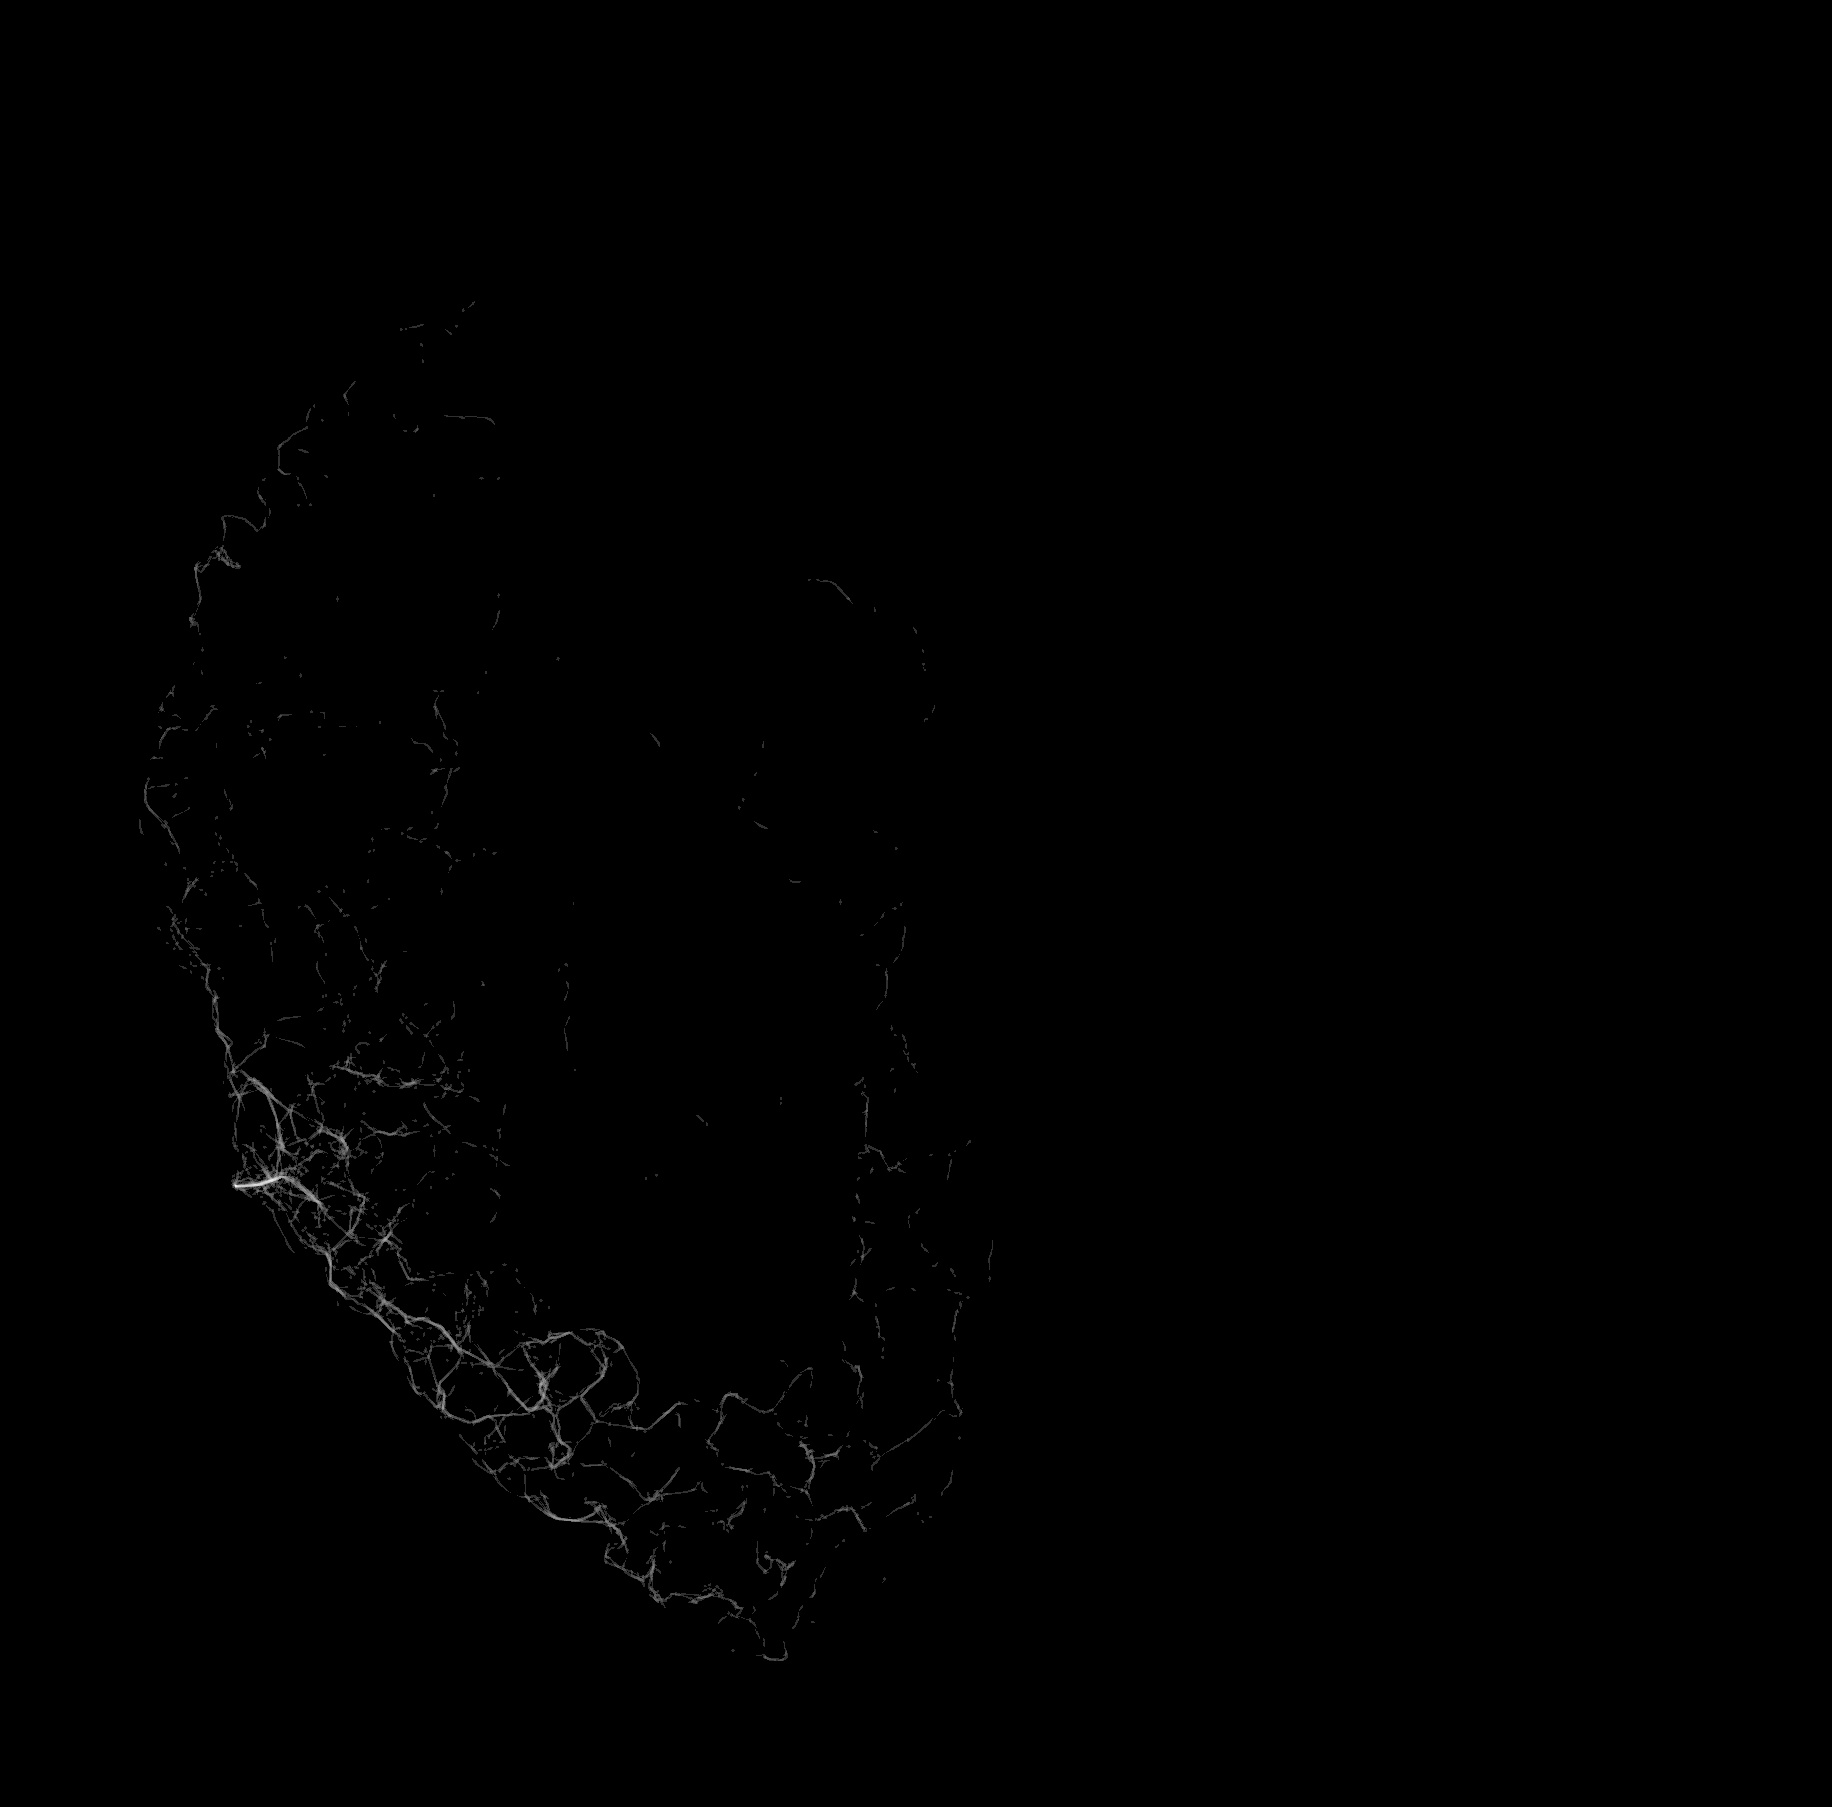

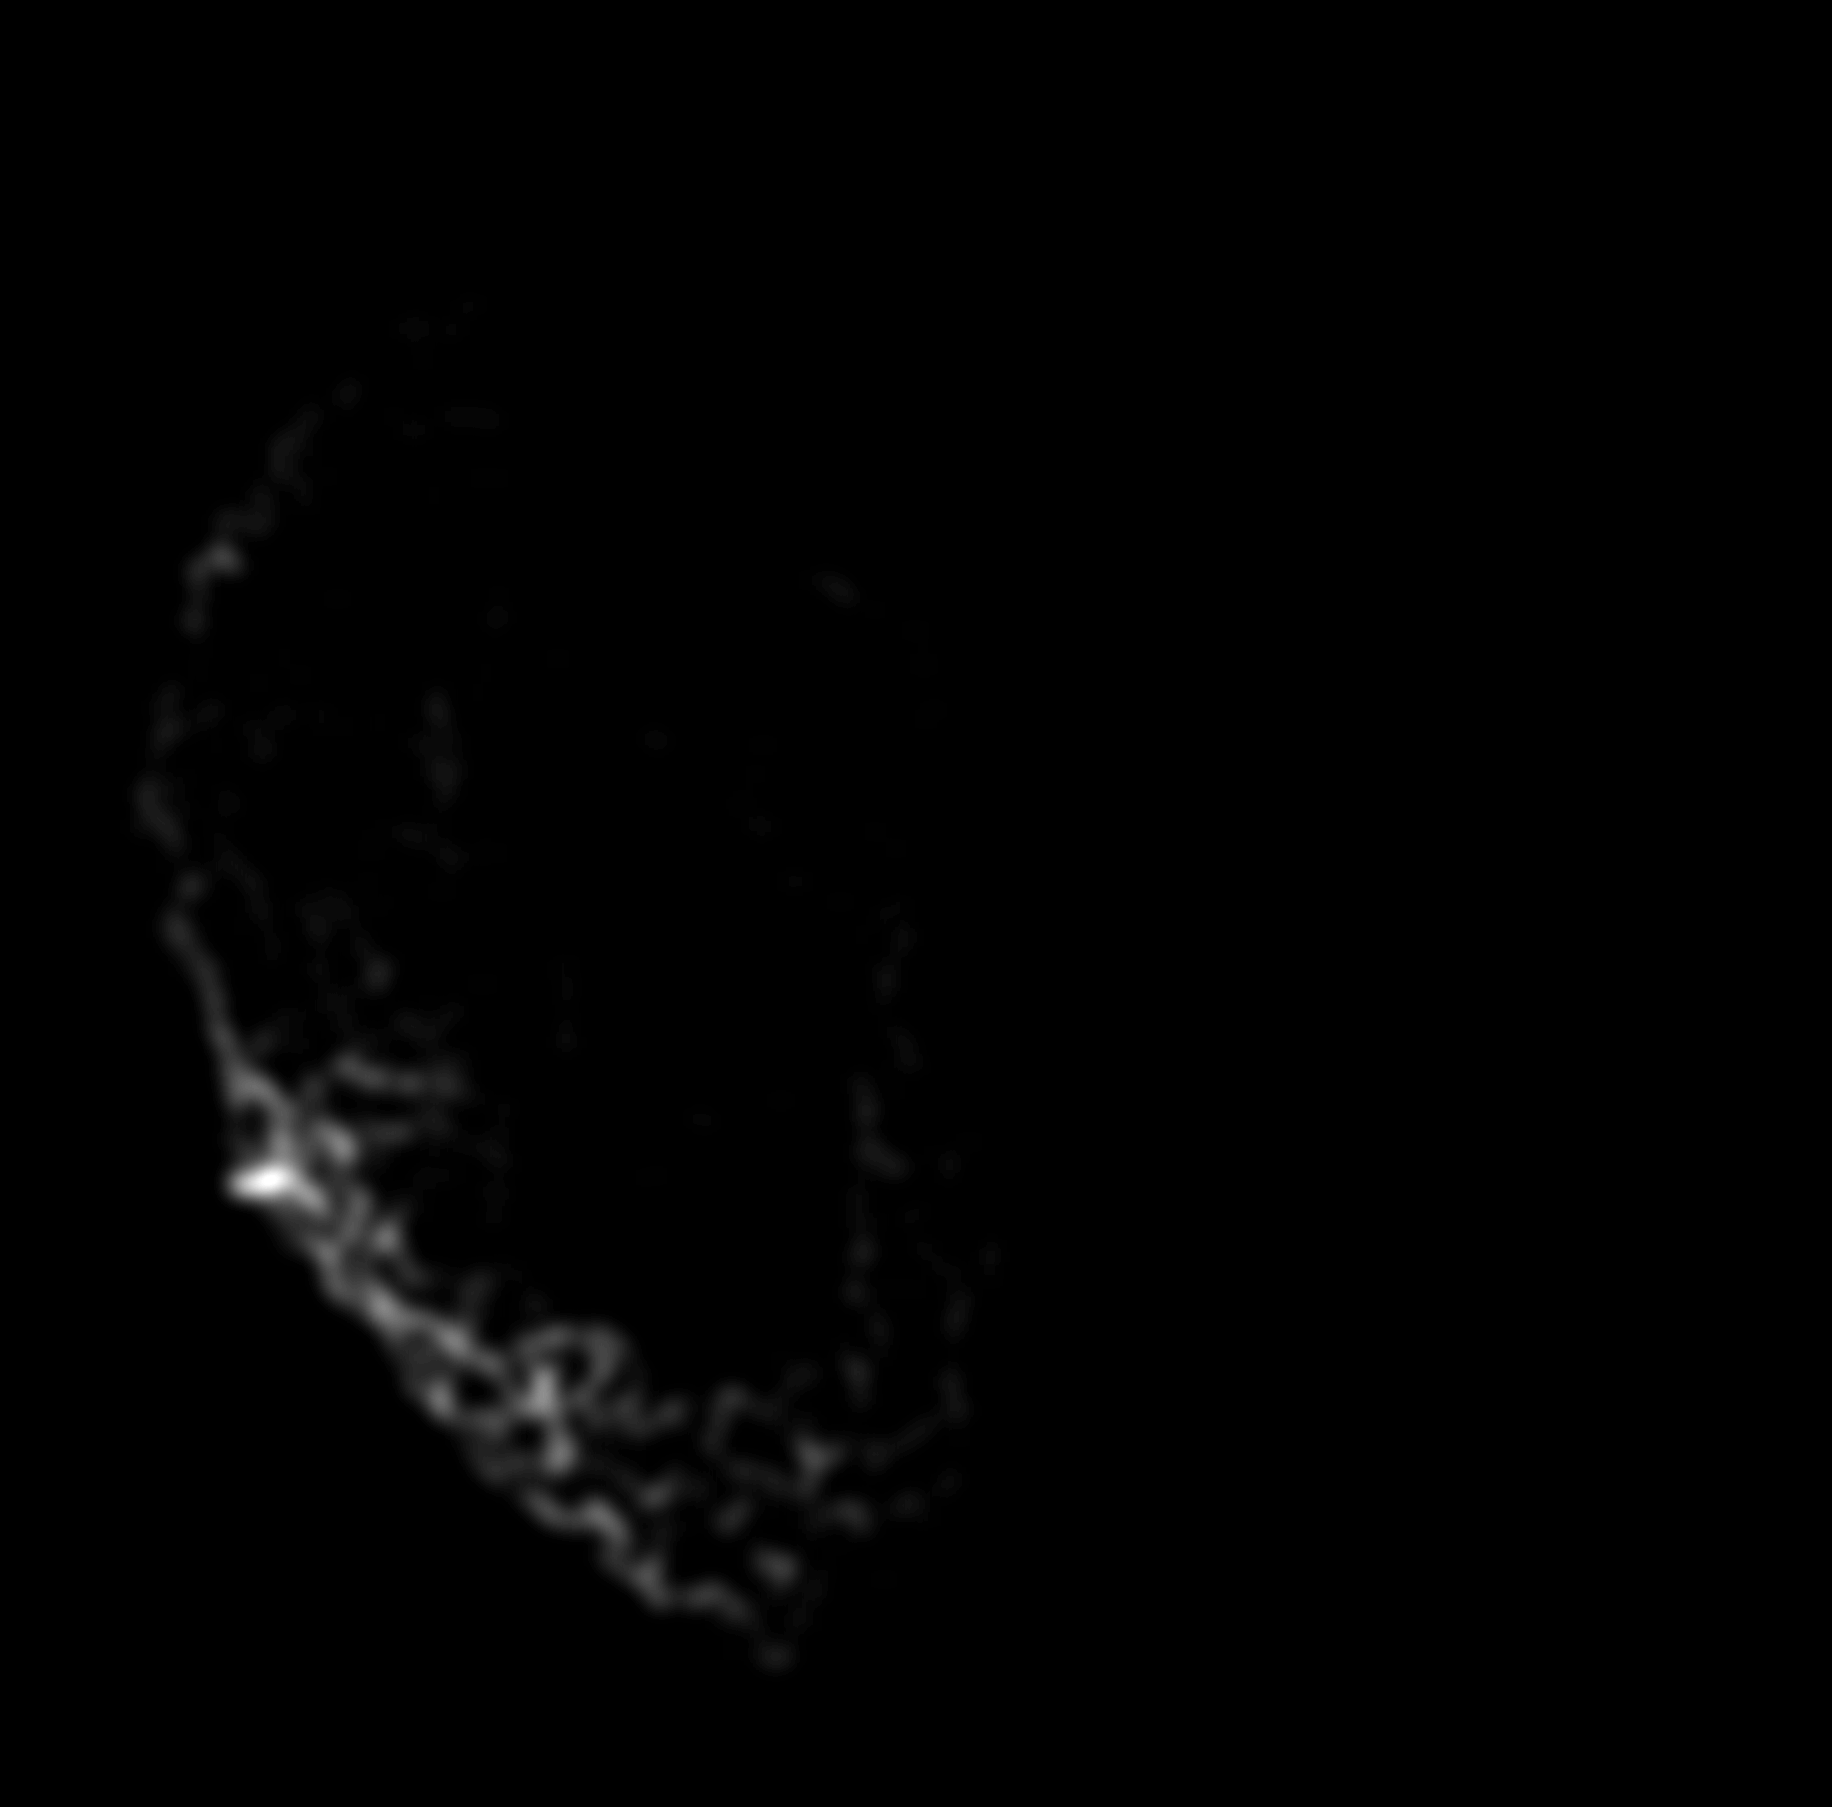

for patchy


100%|██████████| 37/37 [00:18<00:00,  1.96it/s]


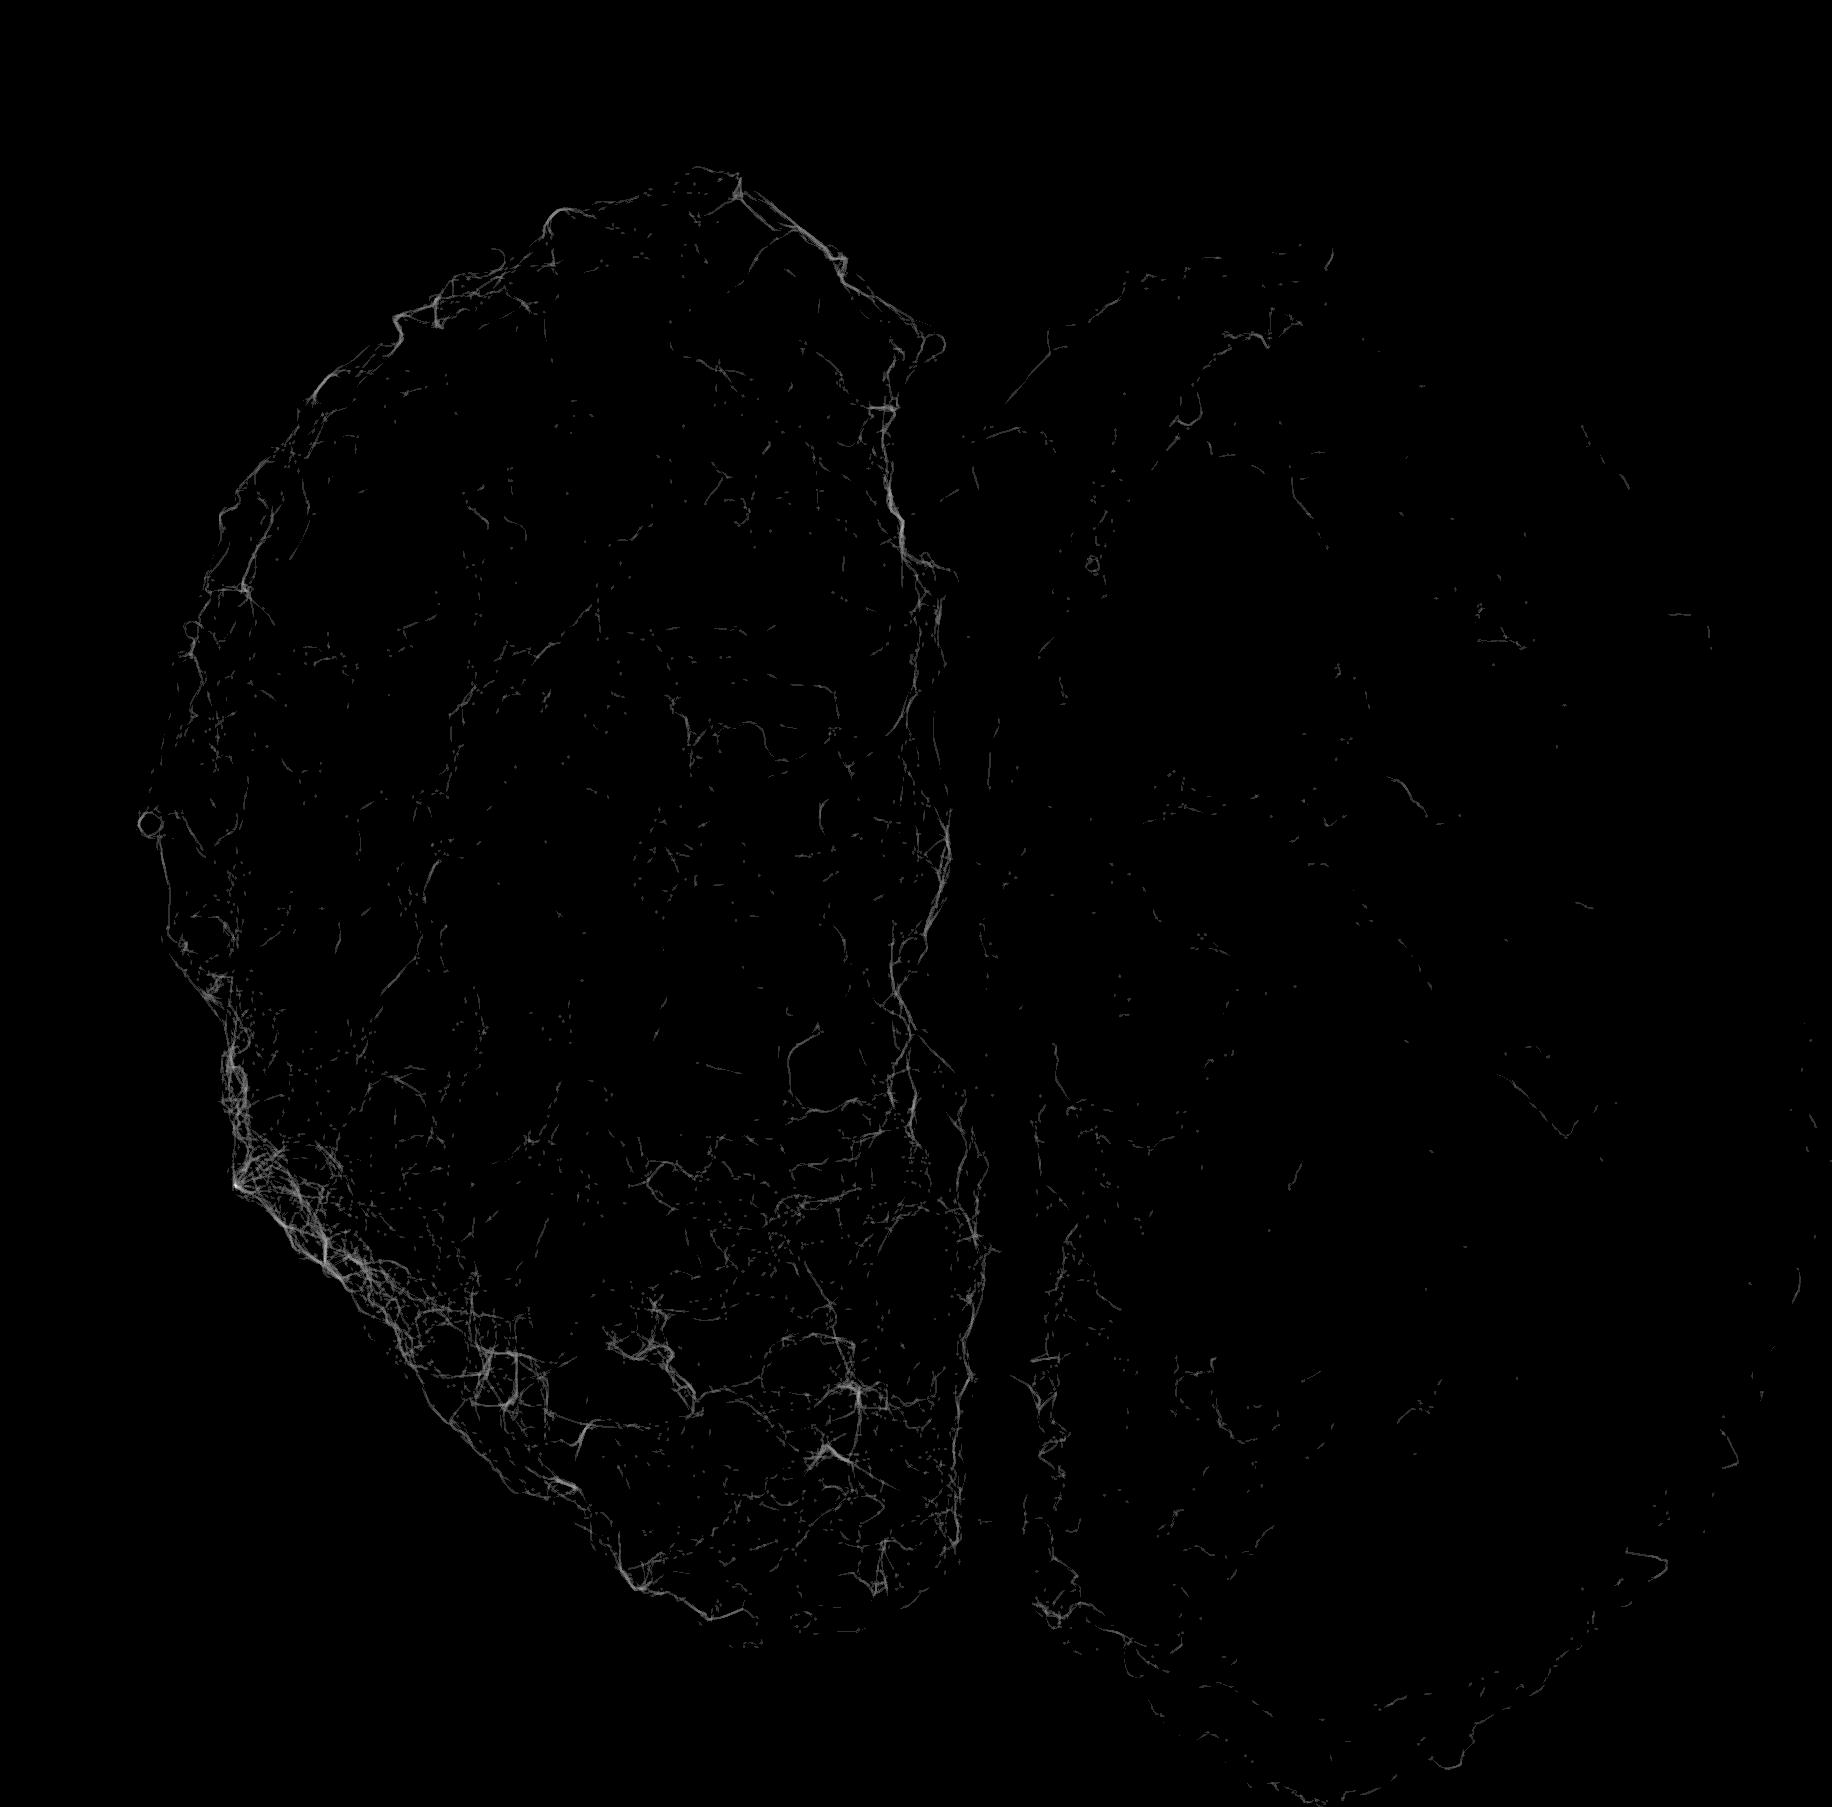

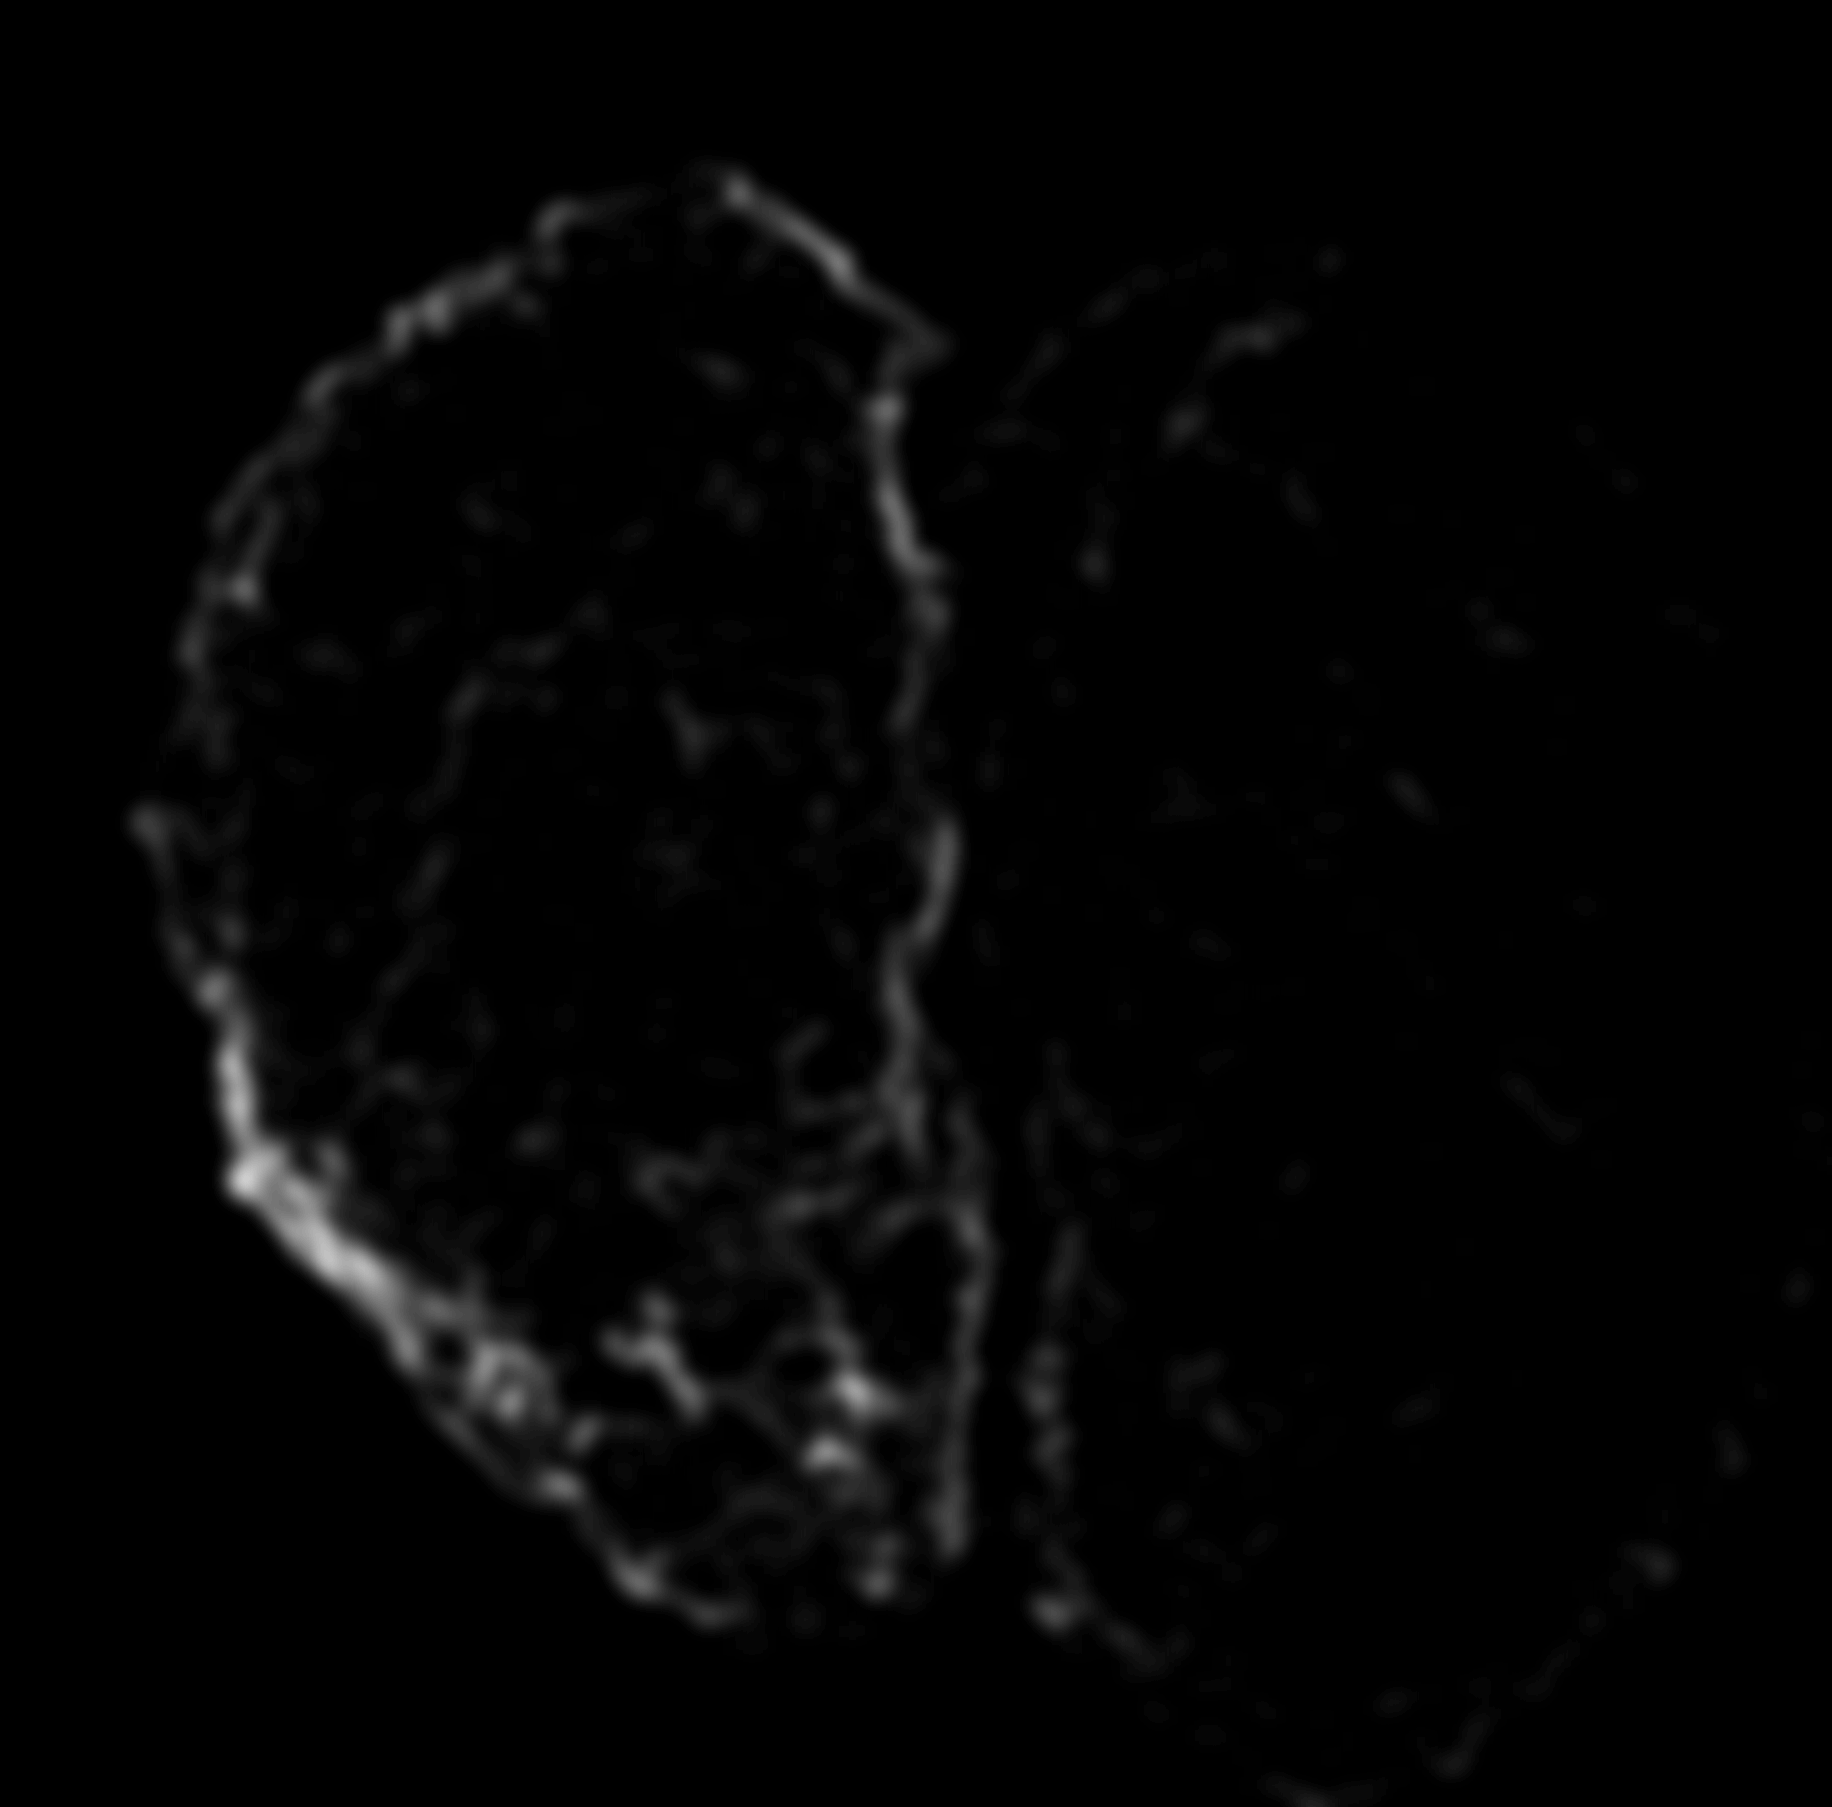

for uniform


100%|██████████| 37/37 [00:17<00:00,  2.15it/s]


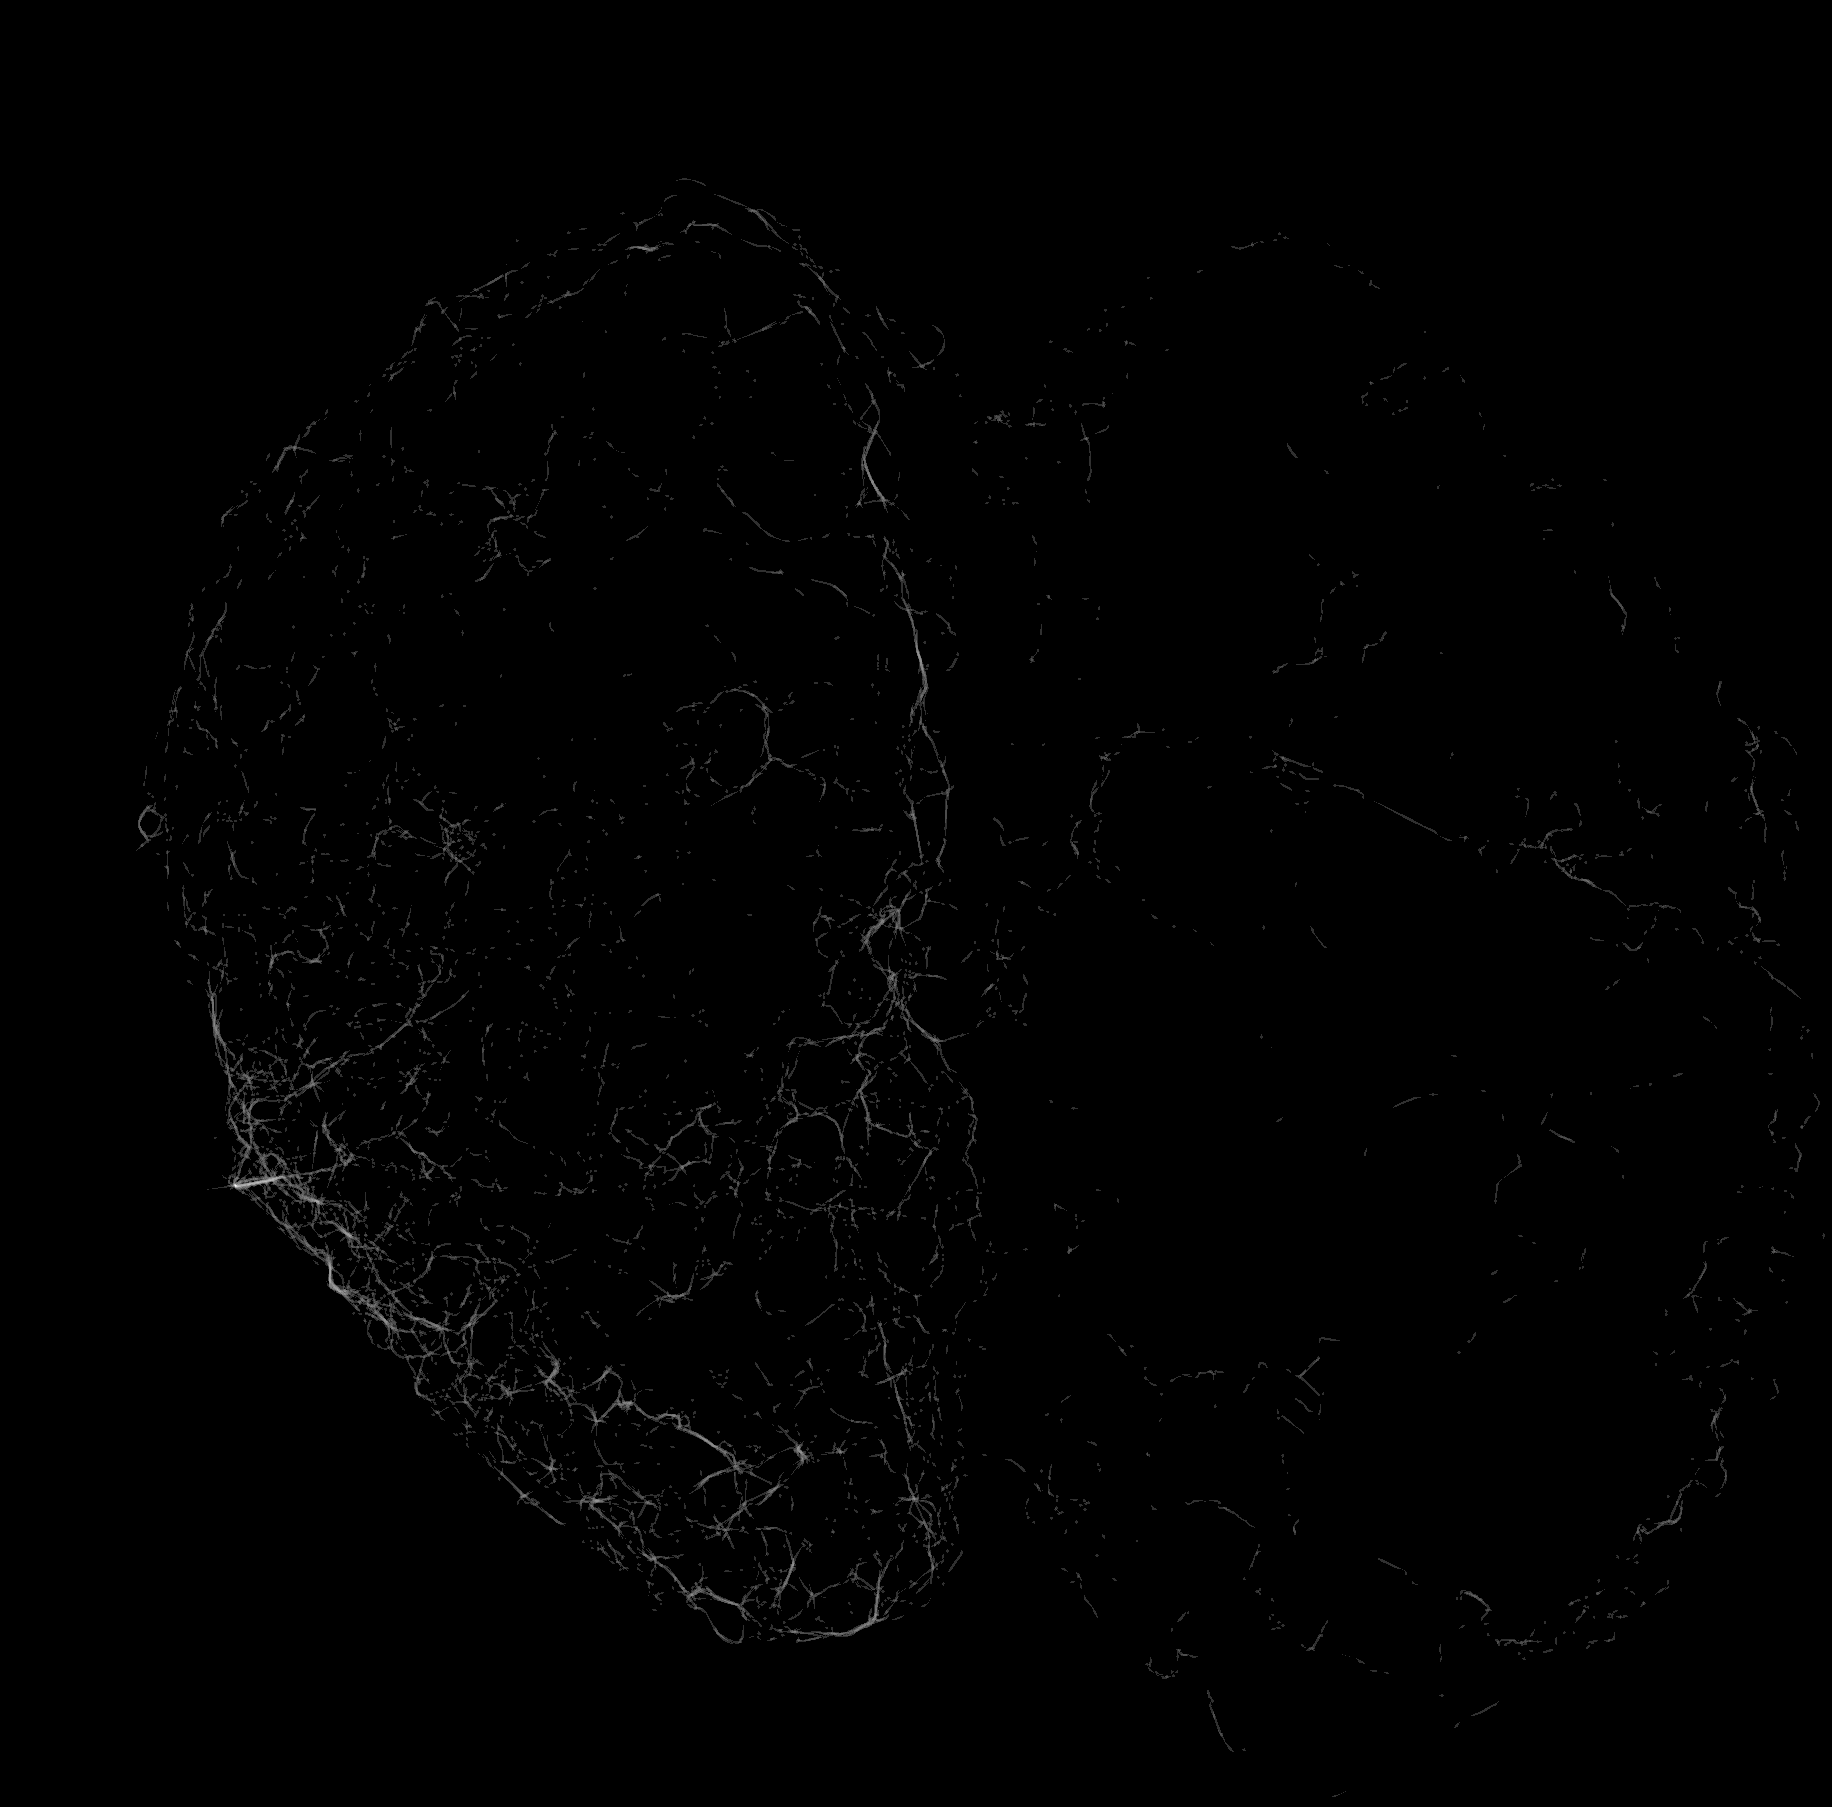

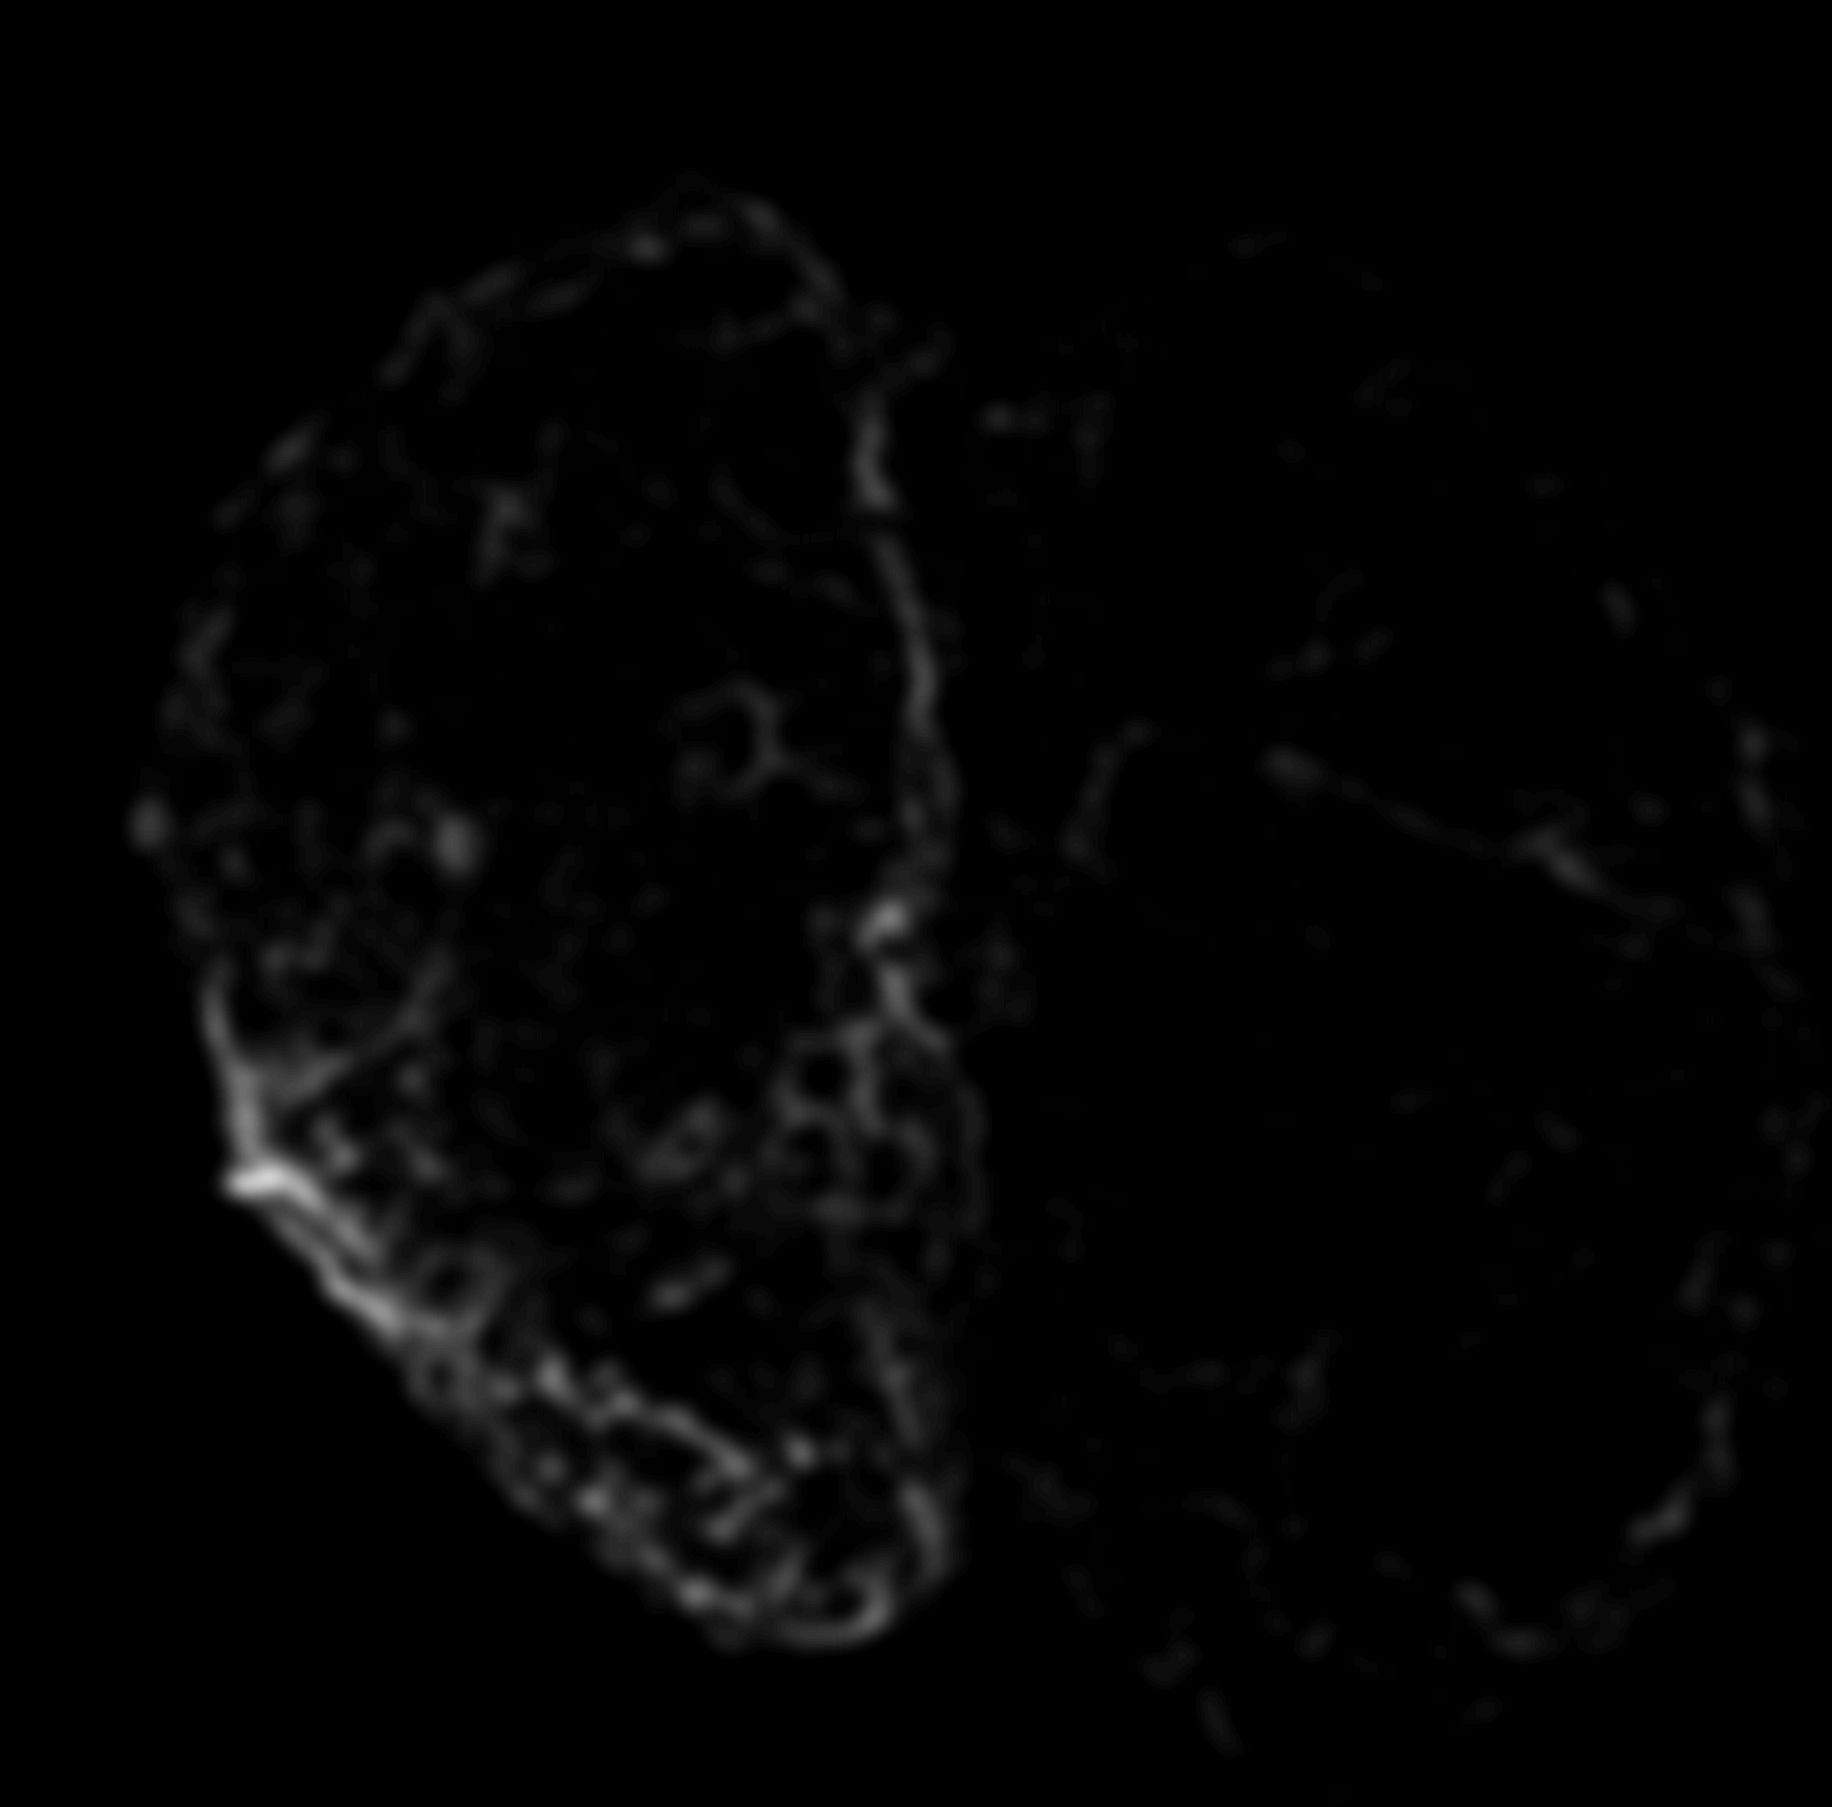

In [6]:
def get_trajectory_array(player_data: NeuroForestSample, session: str) -> np.ndarray:
    session = player_data[session]
    player_coords = transform([c["coord"] for c in session.player_coords], np.array([200, 0, 200]), ZOOM_FACTOR)
    player_coords = player_coords[:,[0,2]]

    with Image.new(mode="1", size=(max_coord_x, max_coord_z)) as im:
        draw = ImageDraw.Draw(im)
        draw.line([tuple(p) for p in player_coords.astype(int)],fill=1, width=2)
        return np.array(im)

for session_type in ["first", "patchy", "uniform"]:
    print(f"for {session_type}")
    overlayed_trajectories = np.zeros((max_coord_z, max_coord_x), dtype=int)
    for player_data in tqdm(dataloader):
        overlayed_trajectories += get_trajectory_array(player_data, session_type)
    log_scaled = np.log(overlayed_trajectories)
    normed = (log_scaled / log_scaled.max()) * 255
    img = Image.fromarray(normed.astype(np.uint8))
    display.display(img)
    img = img.filter(ImageFilter.GaussianBlur(radius = 10))
    img = Contrast(img).enhance(4)
    display.display(img)

In [18]:
img_inverted = ImageOps.invert(img)
np.mean(np.array(img_inverted).flatten()), np.mean(np.array(img).flatten())
img_inverted.show()

In [7]:
null_img = Image.new("L", img.size)
shrooms_rgba = img_shrooms.copy()
shrooms_rgba.putalpha(img_shrooms.convert("1"))
shrooms_rgba.show()

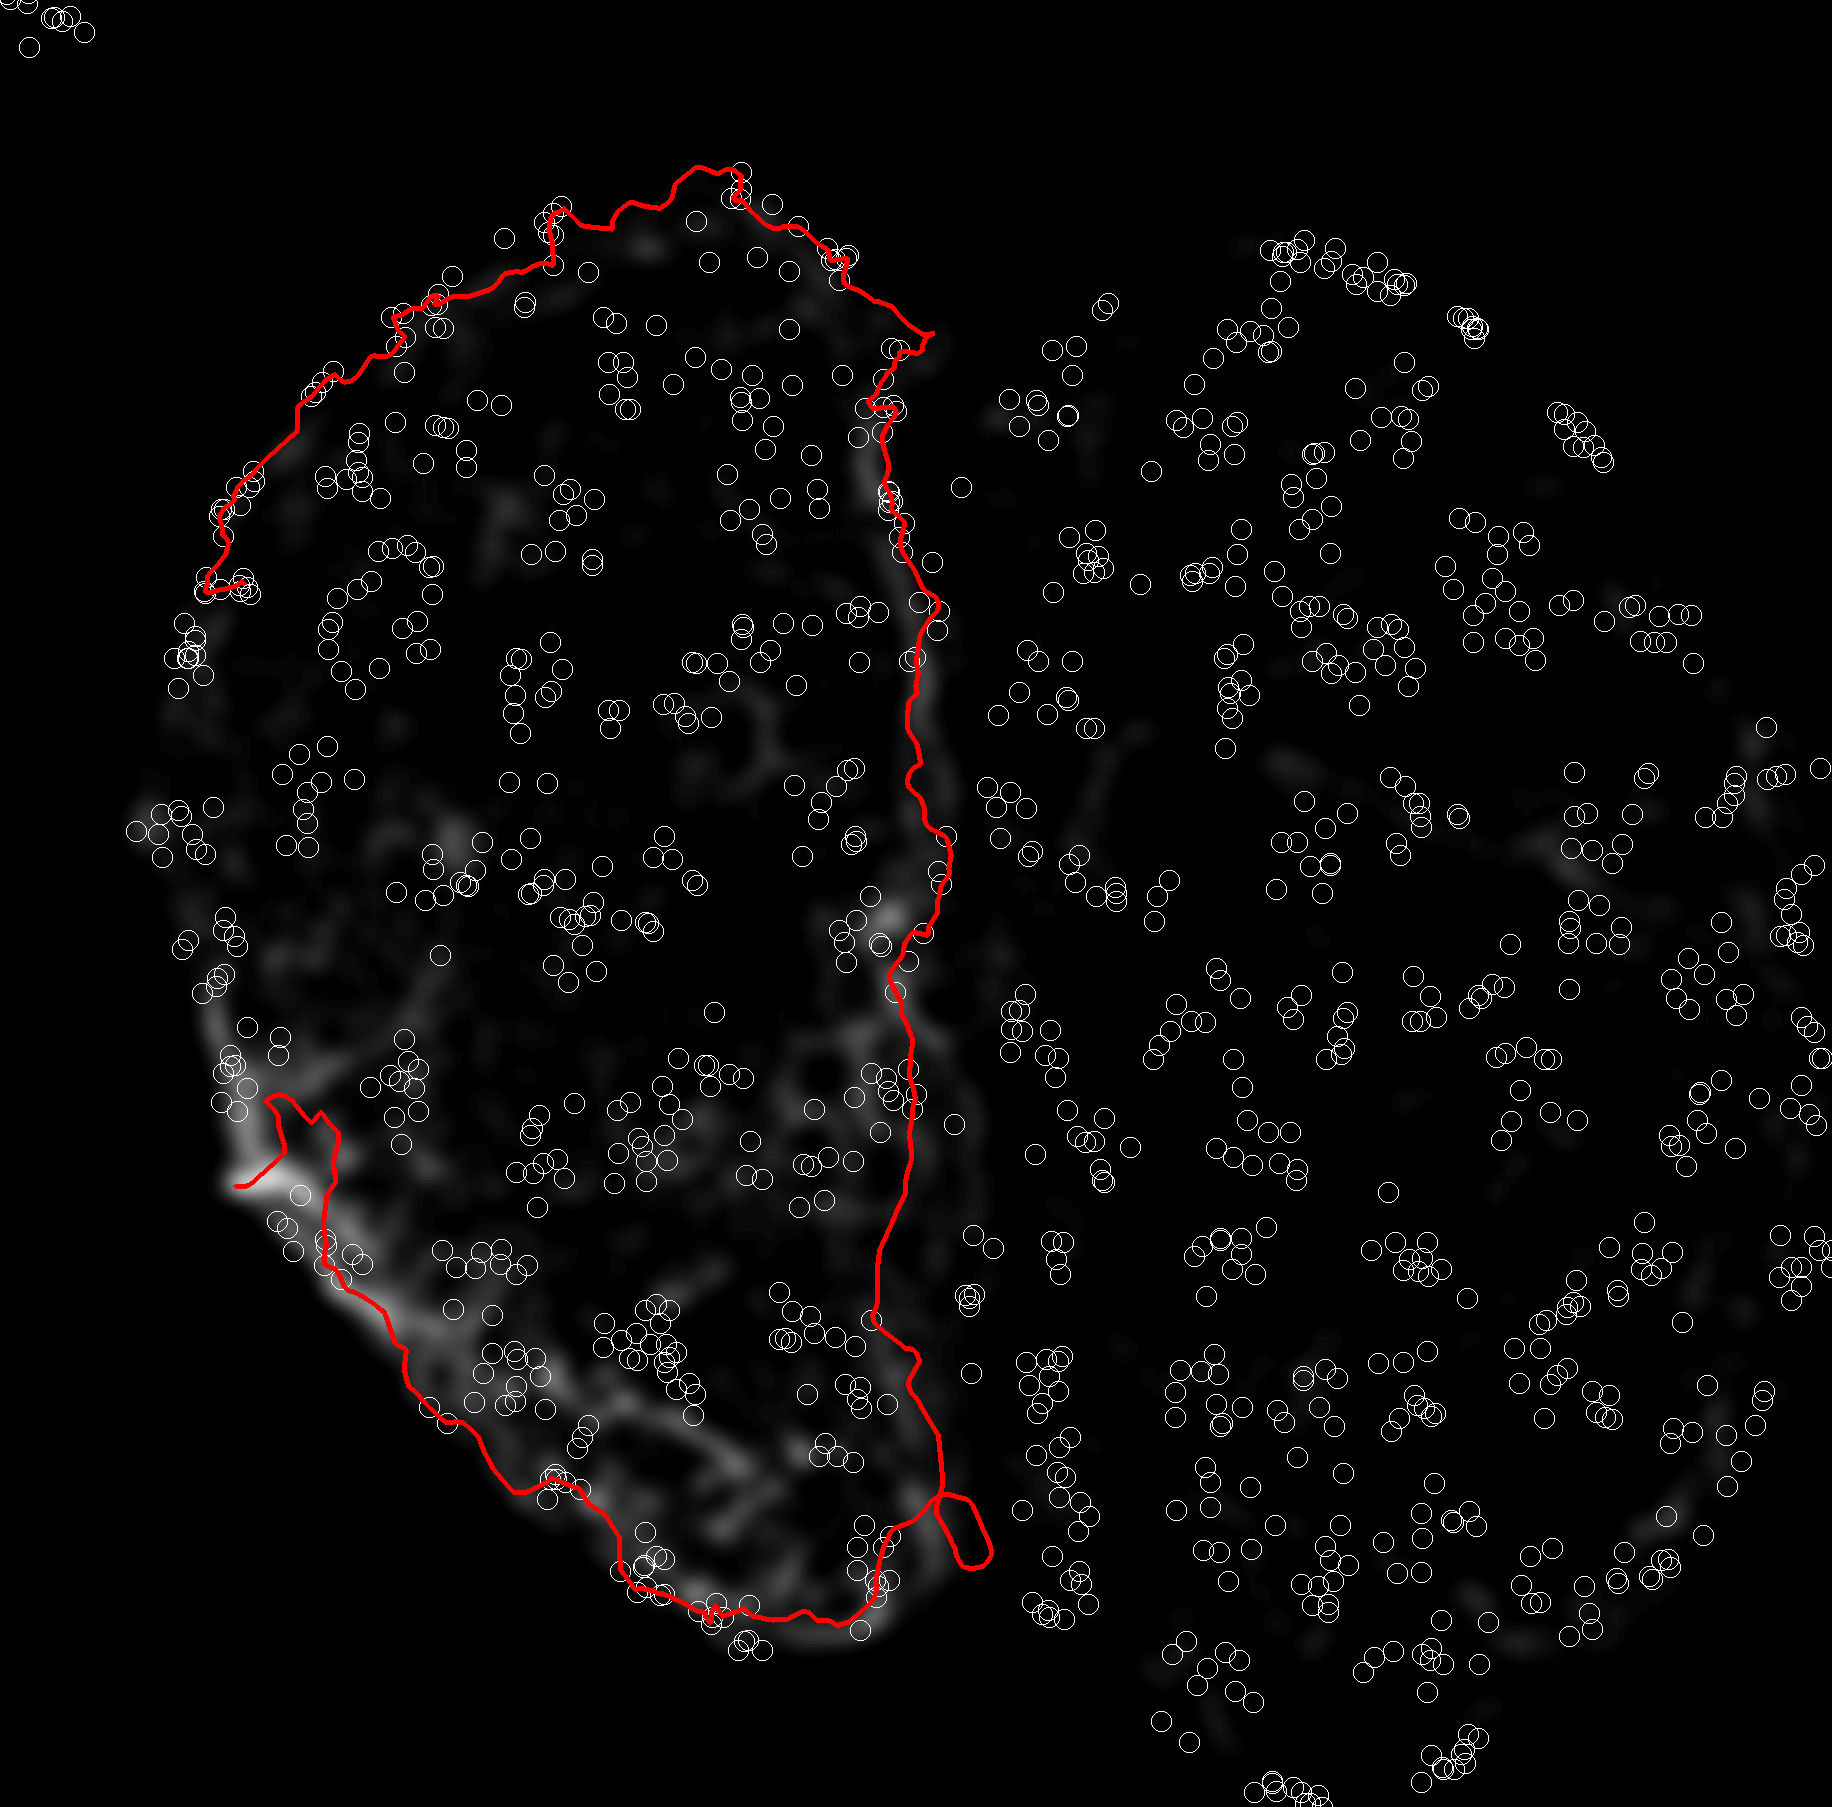

In [8]:
trajectories_img = img.copy().convert("RGB")
alpha_array = (np.array(img_shrooms).sum(axis=2) != 0) * 255
alpha_channel = Image.fromarray(alpha_array.astype(np.uint8), mode="L")
trajectories_img.paste(img_shrooms, mask=alpha_channel)
trajectories_img

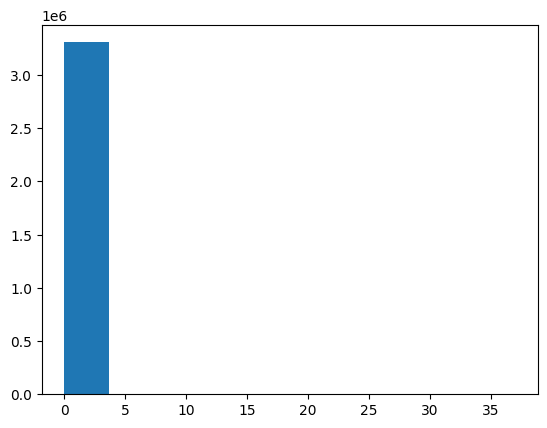


(eog:107888): EOG-WARNING **: 03:53:13.624: Thumbnail creation failed


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

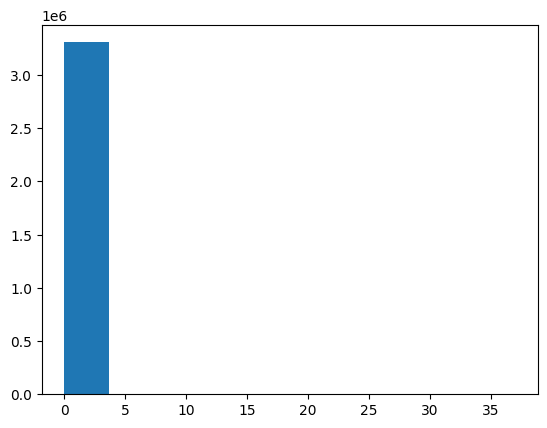

In [9]:
import matplotlib.pyplot as plt
plt.hist(overlayed_trajectories.flatten())
plt.show(overlayed_trajectories)